# Lab1_4

In [1]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative, diff
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint

from IPython.display import display, Latex, clear_output
#%matplotlib inline
import funcs

In [2]:
sm.init_printing(use_latex='mathjax')
x, y, k = sm.symbols('x, y, k', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
u = sm.Function('u')
q = sm.Function('q')
ux = u(x)
ux1 = Derivative(u(x), x)
ux2 = Derivative(u(x), (x, 2))

h, uup1, uum1, uu0 = sm.symbols('h, u_i+1, u_i-1, u_i', Function=True)
uux1 = (uup1 - uum1)/(2*h)
uux2 = (uup1 - 2*uu0 + uum1)/(h**2)

## Взять исходные данные из 1-го набора параметров

In [3]:
zad1 = {'k': x**2,
        'f': 2*x**2 + 2*x,
        'a': 0.5, 'UA': 2,
        'b': 1.6, 'UB': 6}

zad0 = {'K': x,
        'f': x**(sm.Pow(3,-1))*4/3,
        'a': 0.5, 'UA': 1,
        'b': 1, 'UB': 2}

## Шаг сетки положить равным (b - a) / 150 

In [28]:
count, n = 10, 10
n -= 1
funcs.n = n

hh = (zad1['b'] - zad1['a']) / n
us = sm.symbols(' '.join([f"u{i}" for i in range(count)]))
list_x = [zad1['a'] + hh*i for i in range(count)]
display(hh)
display(us)
display(list_x)

0.12222222222222223

(u₀, u₁, u₂, u₃, u₄, u₅, u₆, u₇, u₈, u₉)

[0.5, 0.6222222222222222, 0.7444444444444445, 0.8666666666666667, 0.9888888888
888889, 1.1111111111111112, 1.2333333333333334, 1.3555555555555556, 1.47777777
77777779, 1.6]

## Промоделировать процесс теплопроводности в зависимости от коэффициента k(x):

In [29]:
main = sm.Eq(-diff(zad1['k']*ux1, x),  zad1['f']) #sm.Eq(-x**2*ux2 -2*x*ux1,  zad1['f'])
display(main)
#apro = sm.Eq(-x**2*uux2 -2*x*uux1,  zad1['f'])
#display(apro)
apro = main.replace(ux1, uux1).replace(ux2, uux2)
display(apro)

       2                                  
   2  d              d             2      
- x ⋅───(u(x)) - 2⋅x⋅──(u(x)) = 2⋅x  + 2⋅x
       2             dx                   
     dx                                   

                     2                                   
  x⋅(uᵢ₊₁ - uᵢ₋₁)   x ⋅(-2⋅uᵢ + uᵢ₊₁ + uᵢ₋₁)      2      
- ─────────────── - ──────────────────────── = 2⋅x  + 2⋅x
         h                      2                        
                               h                         

In [33]:
tyts = [apro.subs({x: list_x[i], h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)]
tyts.append(sm.Eq(us[0], zad1['UA']))
tyts.append(sm.Eq(us[count-1], zad1['UB']))
display(*map(lambda e: e.n(3), tyts))

-20.8⋅u₀ + 51.8⋅u₁ - 31.0⋅u₂ = 2.02

-31.0⋅u₁ + 74.2⋅u₂ - 43.2⋅u₃ = 2.6

-43.2⋅u₂ + 101.0⋅u₃ - 57.4⋅u₄ = 3.24

-57.4⋅u₃ + 131.0⋅u₄ - 73.5⋅u₅ = 3.93

-73.5⋅u₄ + 165.0⋅u₅ - 91.7⋅u₆ = 4.69

-91.7⋅u₅ + 204.0⋅u₆ - 112.0⋅u₇ = 5.51

-112.0⋅u₆ + 246.0⋅u₇ - 134.0⋅u₈ = 6.39

-134.0⋅u₇ + 292.0⋅u₈ - 158.0⋅u₉ = 7.32

u₀ = 2.0

u₉ = 6.0

In [43]:
result = sm.solve(tyts, us)
display(*result.items())

(u₀, 2.0)

(u₁, 3.50920047031163)

(u₂, 4.45773846815315)

(u₃, 5.0786039886041)

(u₄, 5.48960096176086)

(u₅, 5.75669958847746)

(u₆, 5.91971971971981)

(u₇, 6.00411994872838)

(u₈, 6.02693647699498)

(u₉, 6.0)

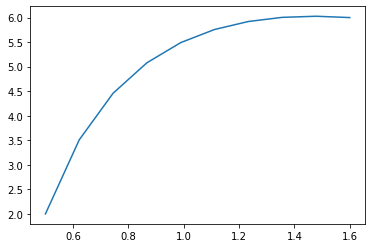

In [47]:
plt.plot(list_x, list(result.values()) )

### Пусть стержень состоит из 2-x материалов с различными свойствами

In [50]:
zad2 = {'f': 2*x**2 + 2*x,
        'k1': 1, 'k2': 2,
        'a': 0.5, 'UA': 2,
        'b': 1.6, 'UB': 6}

M = (zad2['a'] + zad2['b']) / 2
M

1.05

In [51]:
main2 = sm.Eq(-diff(k*ux1, x),  zad2['f']) #sm.Eq(-x**2*ux2 -2*x*ux1,  zad1['f'])
display(main2)
#apro2 = sm.Eq(-x**2*uux2 -2*x*uux1,  zad1['f'])
#display(apro2)
apro2 = main2.replace(ux1, uux1).replace(ux2, uux2)
display(apro2)

     2                   
    d             2      
-k⋅───(u(x)) = 2⋅x  + 2⋅x
     2                   
   dx                    

-k⋅(-2⋅uᵢ + uᵢ₊₁ + uᵢ₋₁)       2      
───────────────────────── = 2⋅x  + 2⋅x
             2                        
            h                         

In [52]:
def gettyts2(K1, K2):
    tyts2 = []
    def_k = lambda x: (K1 if x <= M else K2)
    #tyts.append(sm.Eq((-us[2]+4*us[1]-3*us[0])/(2*hh), zad1['UA']))
    tyts2.append(sm.Eq(-K1*(us[1]-us[0])/(hh) + 0.5*us[0], 0))
    tyts2.extend([apro2.subs({x: list_x[i], k: def_k(list_x[i]), 
                            h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)])
    tyts2.append(sm.Eq(K2*(us[count-2]-us[count-1])/(hh) + 0.5*us[count-1], 0))
    return tyts2
tyts2 = gettyts2(zad2['k1'], zad2['k2'])
tyts21 = gettyts2(zad2['k2'], zad2['k1'])
maper10 = lambda ar: list(map(lambda e: e.n(3), ar))
print(tabulate({'k1<<k2':maper10(tyts2), 'k1>>k2':maper10(tyts21)}, headers='keys', showindex="always", tablefmt="github" , floatfmt=".3f"))

|    | k1<<k2                                    | k1>>k2                                    |
|----|-------------------------------------------|-------------------------------------------|
|  0 | Eq(8.68*u0 - 8.18*u1, 0)                  | Eq(16.9*u0 - 16.4*u1, 0)                  |
|  1 | Eq(-66.9*u0 + 134.0*u1 - 66.9*u2, 2.02)   | Eq(-134.0*u0 + 268.0*u1 - 134.0*u2, 2.02) |
|  2 | Eq(-66.9*u1 + 134.0*u2 - 66.9*u3, 2.6)    | Eq(-134.0*u1 + 268.0*u2 - 134.0*u3, 2.6)  |
|  3 | Eq(-66.9*u2 + 134.0*u3 - 66.9*u4, 3.24)   | Eq(-134.0*u2 + 268.0*u3 - 134.0*u4, 3.24) |
|  4 | Eq(-66.9*u3 + 134.0*u4 - 66.9*u5, 3.93)   | Eq(-134.0*u3 + 268.0*u4 - 134.0*u5, 3.93) |
|  5 | Eq(-134.0*u4 + 268.0*u5 - 134.0*u6, 4.69) | Eq(-66.9*u4 + 134.0*u5 - 66.9*u6, 4.69)   |
|  6 | Eq(-134.0*u5 + 268.0*u6 - 134.0*u7, 5.51) | Eq(-66.9*u5 + 134.0*u6 - 66.9*u7, 5.51)   |
|  7 | Eq(-134.0*u6 + 268.0*u7 - 134.0*u8, 6.39) | Eq(-66.9*u6 + 134.0*u7 - 66.9*u8, 6.39)   |
|  8 | Eq(-134.0*u7 + 268.0*u8 - 134.0*u9, 7.32) |

In [54]:
result = sm.solve(tyts2, us)
result2 = sm.solve(tyts21, us)
print(tabulate({'U':result.keys(), 'k1<<k2':maper10(result.values()), 'k1>>k2':maper10(result2.values())}, headers='keys', tablefmt="github" , floatfmt=".3f"))

| U   |   k1<<k2 |   k1>>k2 |
|-----|----------|----------|
| u0  |   22.434 |   -7.625 |
| u1  |   23.805 |   -7.857 |
| u2  |   25.148 |   -8.105 |
| u3  |   26.449 |   -8.373 |
| u4  |   27.703 |   -8.664 |
| u5  |   28.898 |   -8.986 |
| u6  |   30.059 |   -9.377 |
| u7  |   31.176 |   -9.850 |
| u8  |   32.250 |  -10.420 |
| u9  |   33.266 |  -11.098 |


### Пусть стержень состоит из 3-x материалов с различными свойствами

In [58]:
zad3 = {'f': 2*x**2 + 2*x,
        'k01': 1, 'k02': 2, 'k03': 3,
        'k11': 3, 'k12': 2, 'k13': 1,
        'k21': 2, 'k22': 4, 'k23': 2,
        'k31': 60, 'k32': 3, 'k33': 60,
        'a': 0.5, 'UA': 2,
        'b': 1.6, 'UB': 6}
M1 = zad3['a'] + (zad3['b'] - zad3['a']) / 3
M2 = zad3['a'] + 2*(zad3['b'] - zad3['a']) / 3

In [59]:
def gettyts3(K1, K2, K3):
    tyts3 = []
    def_k = lambda x: (K1 if x <= M1 else (K2 if x <= M2 else K3))
    #tyts.append(sm.Eq((-us[2]+4*us[1]-3*us[0])/(2*hh), zad1['UA']))
    tyts3.append(sm.Eq(-K1*(us[1]-us[0])/(hh) + 0.5*us[0], 0))
    tyts3.extend([apro2.subs({x: list_x[i], k: def_k(list_x[i]), 
                            h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)])
    tyts3.append(sm.Eq(K2*(us[count-2]-us[count-1])/(hh) + 0.5*us[count-1], 0))
    return tyts3
tyts3 = gettyts3(zad3['k01'], zad3['k02'], zad3['k03'])
tyts31 = gettyts3(zad3['k11'], zad3['k12'], zad3['k13'])
tyts32 = gettyts3(zad3['k21'], zad3['k22'], zad3['k23'])
tyts33 = gettyts3(zad3['k31'], zad3['k32'], zad3['k33'])
maper10 = lambda ar: list(map(lambda e: e.n(3), ar))
print(tabulate({'k1 < k2 < k3':maper10(tyts3), 'k1 > k2 > k3':maper10(tyts31)}, headers='keys', showindex="always", tablefmt="presto" , floatfmt=".3f"))
print()
print(tabulate({'k1=k, k2=2k, k3=k':maper10(tyts32), 'k1=20k, k2=k, k3=20k':maper10(tyts33)}, headers='keys', showindex="always", tablefmt="presto" , floatfmt=".3f"))

    | k1 < k2 < k3                              | k1 > k2 > k3
----+-------------------------------------------+-------------------------------------------
  0 | Eq(8.68*u0 - 8.18*u1, 0)                  | Eq(25.0*u0 - 24.5*u1, 0)
  1 | Eq(-66.9*u0 + 134.0*u1 - 66.9*u2, 2.02)   | Eq(-201.0*u0 + 402.0*u1 - 201.0*u2, 2.02)
  2 | Eq(-66.9*u1 + 134.0*u2 - 66.9*u3, 2.6)    | Eq(-201.0*u1 + 402.0*u2 - 201.0*u3, 2.6)
  3 | Eq(-66.9*u2 + 134.0*u3 - 66.9*u4, 3.24)   | Eq(-201.0*u2 + 402.0*u3 - 201.0*u4, 3.24)
  4 | Eq(-134.0*u3 + 268.0*u4 - 134.0*u5, 3.93) | Eq(-134.0*u3 + 268.0*u4 - 134.0*u5, 3.93)
  5 | Eq(-134.0*u4 + 268.0*u5 - 134.0*u6, 4.69) | Eq(-134.0*u4 + 268.0*u5 - 134.0*u6, 4.69)
  6 | Eq(-134.0*u5 + 268.0*u6 - 134.0*u7, 5.51) | Eq(-134.0*u5 + 268.0*u6 - 134.0*u7, 5.51)
  7 | Eq(-201.0*u6 + 402.0*u7 - 201.0*u8, 6.39) | Eq(-66.9*u6 + 134.0*u7 - 66.9*u8, 6.39)
  8 | Eq(-201.0*u7 + 402.0*u8 - 201.0*u9, 7.32) | Eq(-66.9*u7 + 134.0*u8 - 66.9*u9, 7.32)
  9 | Eq(16.4*u8 - 15.9*u9, 0)        

In [60]:
result = sm.solve(tyts3, us)
result2 = sm.solve(tyts31, us)
result3 = sm.solve(tyts32, us)
result4 = sm.solve(tyts33, us)
print(tabulate({'U':result.keys(), 'k1 < k2 < k3':maper10(result.values()), 'k1 > k2 > k3':maper10(result2.values()),
                'k1=k, k2=2k, k3=k':maper10(result3.values()), 'k1=20k, k2=k, k3=20k':maper10(result4.values())}, headers='keys', tablefmt="github" , floatfmt=".3f"))

| U   |   k1 < k2 < k3 |   k1 > k2 > k3 |   k1=k, k2=2k, k3=k |   k1=20k, k2=k, k3=20k |
|-----|----------------|----------------|---------------------|------------------------|
| u0  |         18.254 |        -20.242 |              18.262 |                 -3.572 |
| u1  |         19.371 |        -20.656 |              18.820 |                 -3.576 |
| u2  |         20.453 |        -21.078 |              19.363 |                 -3.580 |
| u3  |         21.500 |        -21.512 |              19.887 |                 -3.585 |
| u4  |         22.500 |        -21.965 |              20.383 |                 -3.590 |
| u5  |         23.469 |        -22.445 |              20.867 |                 -3.616 |
| u6  |         24.402 |        -22.961 |              21.336 |                 -3.664 |
| u7  |         25.293 |        -23.516 |              21.781 |                 -3.740 |
| u8  |         26.156 |        -24.168 |              22.180 |                 -3.818 |
| u9  |         26.98

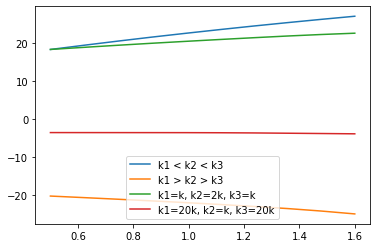

In [74]:
plt.plot( list_x, list(result.values()), label="k1 < k2 < k3")
plt.plot(list_x, list(result2.values()), label="k1 > k2 > k3")
plt.plot(list_x, list(result3.values()), label="k1=k, k2=2k, k3=k")
plt.plot(list_x, list(result4.values()), label="k1=20k, k2=k, k3=20k")
plt.legend(loc='best')